#NLP AND DL Project



## **Introduction:**

One of the most crucial ideas in data analysis has always been text analysis. In addition to its numerous business-to-business applications, it is widely employed by several Fortune 500 businesses to comprehend consumer opinions.

We have adopted a strategy to address the Kaggle-hosted Disaster Tweet problem statement.

The competition details can be found at (https://www.kaggle.com/competitions/nlp-getting-started/overview)


## **Contents of the Workbook :**

#### Step - 1: Importing Necesaary Libraries and Datasets
#### Step - 2: Data Pre-processing
#### Step - 3: Sentiment Analysis using Deep-Learning Model

## **Step - 1 :** *Importing Necesaary Libraries and Datasets*

### **Step - 1.1 :** *Importing Necesaary Packages & Libraries*

In [ ]:
# DataFrame
import pandas as pd

# Matplot & Seaborn Graphing Libraries
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)


# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import (LSTM, 
                          Activation,
                          Conv1D,
                          MaxPooling1D,
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.initializers import Constant
from tensorflow.keras import optimizers

# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')

# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict

# Warnings
import warnings 
warnings.filterwarnings('ignore')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Socket
from socket import socket




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Step - 1.2 :** *Importing Dataset*

In [ ]:
## Importing Train Dataset

train = pd.read_csv("/content/drive/MyDrive/train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
## Importing Test Dataset

test = pd.read_csv("/content/drive/MyDrive/test.csv")
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [ ]:
# Collating both train and test datasets for data pre-processing 
df_train_uptd = train.drop("target", axis = 1)

# Combining both test and train datasets for merged dataset creation
# Here data schema between the two datasets are exactly similar. Hence we can use concat() to merge rows

df = pd.concat([df_train_uptd,test], axis = 0, ignore_index= True)
print("Total rows present = ", len(df))
df.head(5)

Total rows present =  10876


,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10876 non-null  int64 
 1   keyword   10789 non-null  object
 2   location  7238 non-null   object
 3   text      10876 non-null  object
dtypes: int64(1), object(3)
memory usage: 340.0+ KB


**QC Check :** Sum of total rows from Train and Test datasets should match with total rows of merged dataset. 7613 + 3263 = 10876. QC Passed

## **Step - 2 :** *Data Pre-processing*

Text(0.5, 1.0, 'DISASTER Distribution')

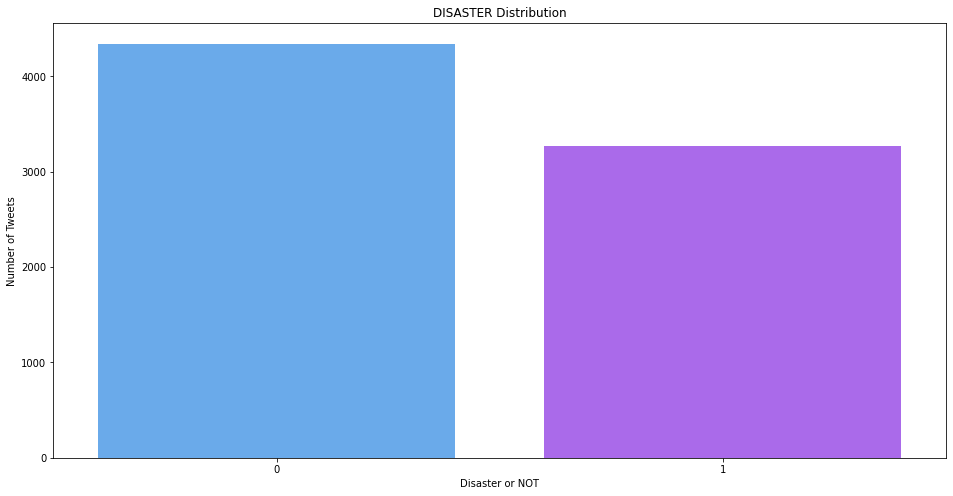

In [ ]:
plt.figure(figsize=(16,8))
x = train.target.value_counts()
sns.barplot(x.index, x, palette='cool')
plt.gca().set_ylabel('Number of Tweets')
plt.gca().set_xlabel('Disaster or NOT')
plt.title("DISASTER Distribution")

**Observation:** It can be observed that actual disaster tweets are less than fake ones

Snowball Stemmer: It is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer since some issues of it were fixed in this stemmer

In [ ]:
""" 'i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now'"""

" 'i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now'"

#Following the NLP Pipeline

![](https://miro.medium.com/max/1400/1*CbzCcP3XFtYVJmWowZLugQ.png)

In [ ]:
  # Including Stopwords and exclusing 'not' related stopwords

stop_words = set(stopwords.words("english"))
stop_words.remove('not')
more_stopwords = {'i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now'}
stop_words = stop_words.union(more_stopwords)

                 
stemmer = SnowballStemmer("english")



The negation words (not, nor, never) are considered to be stopwords in NLTK, spacy and sklearn, but we should pay different attention based on NLP task

For our use case, An example may be taken to understand the motivation behind excluding not

'The news of the Earthquake is not fake'

If not was removed then it would be

'news earthquke fake' which may be interpretted as the earthquke not actually occurring.

In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'^[^ ]<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_quotes(text):
    quotes = re.compile(r'[^A-Za-z0-9\s]+')
    return re.sub(quotes, '', text)


# Applying remove functions and stroing in mod text

df['mod_text'] = df['text'].apply(lambda x: remove_URL(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_emoji(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_html(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_punct(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_quotes(x))
df.head()

,id,keyword,location,text,mod_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...


In [ ]:
# Tokenizing the tweet base texts. Using nltk.tokenize

df['tokenized'] = df['mod_text'].apply(word_tokenize) #Was not working earlier, have to use .apply for a DataFrame

df.head()

,id,keyword,location,text,mod_text,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala..."


In [ ]:
# Lower casing clean text.

df['lower'] = df['tokenized'].apply(
    lambda x: [word.lower() for word in x])

df.head()

,id,keyword,location,text,mod_text,tokenized,lower
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala..."


In [ ]:
# Removing stopwords.

df['stopwords_removed'] = df['lower'].apply(
    lambda x: [word for word in x if word not in stop_words])

df.head()




,id,keyword,location,text,mod_text,tokenized,lower,stopwords_removed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
# Applying part of speech tags.

df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)

df.head()




,id,keyword,location,text,mod_text,tokenized,lower,stopwords_removed,pos_tags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N..."


In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


df['wordnet_pos'] = df['pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df.head()

,id,keyword,location,text,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (..."


The tags we currently have are incompatible with Wordnet, and will not be recognized by it.
They are of type NN (Noun),JJ (Adjective),VB (Verb Base Form) ,RB (Adverb).
We ran nltk.pos_tag() directly without training it. The function will load a pretrained tagger from a file.


If we used the WordnetTagger by default, we would need to train it. To circumvent this training time, we use the following mapping.

In [ ]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

df['lemmatized'] = df['wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x]) #Lemmatizing words, tags not in stopwords

df['lemmatized'] = df['lemmatized'].apply(
    lambda x: [word for word in x if word not in stop_words])

df['lemma_str'] = [' '.join(map(str, l)) for l in df['lemmatized']]

df.head()

,id,keyword,location,text,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...


In [ ]:
print("Total Rows =", len(df.lemmatized))

Total Rows = 10876


In [ ]:
df_final = df[["lemma_str", "id"]]
df_final.head()

,lemma_str,id
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,4
2,resident ask shelter place notify officer evac...,5
3,13000 people receive wildfire evacuation order...,6
4,get sent photo ruby alaska smoke wildfires pou...,7


In [ ]:
## Breaking df to train dataset

treated_train = pd.merge(train, df_final, on='id')
treated_train.tail()



,id,keyword,location,text,target,lemma_str
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridge collapse nearby home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5km volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate ebike collide car little po...
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,late home raze northern california wildfire ab...


In [ ]:
y = treated_train['target']

In [ ]:
## Breaking df to test dataset

treated_test = pd.merge(test, df_final, on='id')
treated_test.tail()



,id,keyword,location,text,lemma_str
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri bad last hurricane cityamp3others har...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,cityofcalgary activate municipal emergency pla...


## **Step - 3 :** *Deep-Learning Model*

**Deep learning** can be considered as a subset of machine learning. It is a field that is based on learning and improving on its own by examining computer algorithms. While machine learning uses simpler concepts, deep learning works with artificial neural networks, which are designed to imitate how humans think and learn. Until recently, neural networks were limited by computing power and thus were limited in complexity. However, advancements in Big Data analytics have permitted larger, sophisticated neural networks, allowing computers to observe, learn, and react to complex situations faster than humans. Deep learning has aided image classification, language translation, speech recognition. It can be used to solve any pattern recognition problem and without human intervention.


![](https://miro.medium.com/max/1200/0*KfJUyVjsS9ZhxcBk.png)

**Long short-term memory (LSTM)** is an artificial recurrent neural network architecture used in the field of deep learning.
Unlike standard feedforward neural networks, LSTM has feedback connections.

It removes the problem of vanishing gradient

It never keeps the entire data like standard recurrent neural network, lstm keeps short-term memory of data.


Long Short Term Memory Network is an advanced RNN, a sequential network, that allows information to persist.

*Let’s say while watching a video you remember the previous scene or while reading a book you know what happened in the earlier chapter. Similarly RNNs work, they remember the previous information and use it for processing the current input.*



Long short-term memory (LSTM) is a deep learning architecture based on an artificial recurrent neural network (RNN).
LSTMs are a viable answer for problems involving sequences and time series.
The difficulty in training them is one of its disadvantages since even a simple model takes a lot of time and system resources to train. However, this is only a hardware constraint.
The problem with traditional RNNs is that they can only use the prior contexts. BRNNs (Bidirectional RNNs) accomplish this by processing data in both directions.



<!-- 
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/LSTM_Cell.svg/1200px-LSTM_Cell.svg.png) -->

![](https://d2mk45aasx86xg.cloudfront.net/image17_11zon_2727417658.webp)

### **Step - 3.1 :** Token Creation

In [ ]:
max_features=3000 #the maximum number of words to keep, based on word frequency.
tokenizer=Tokenizer(num_words=max_features,split=' ') #	str. Separator for word splitting.
tokenizer.fit_on_texts(treated_train['lemma_str'].values)
X = tokenizer.texts_to_sequences(treated_train['lemma_str'].values)
X = pad_sequences(X) #used to ensure that all sequences in a list have the same length.

**fit_on_texts** Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary like word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer can be more frequent word since often the first few are stop words because they appear a lot.


**texts_to_sequences** Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. 


Max features taken from https://stackoverflow.com/questions/61760508/how-to-choose-num-words-parameter-for-keras-tokenizer

### **Step - 3.2 :** Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =41)

### **Step - 3.3 :** Model Creation - LSTM

In [ ]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'


Discussions on kaggle say using the above cell for this dataset task enables the GPU to run faster

**"I notice that with XLA, the use of GPU is almost 100%,, and much faster to finish the job. Without, it is taking much more time, with less than 40% usage."**

Link to discussion : https://github.com/tensorflow/tensorflow/issues/44683


XLA (accelerated linear algebra) is a compiler-based linear algebra execution engine. It is the backend that powers machine learning frameworks such as TensorFlow and JAX at Google


In [ ]:
# Initiating callbacks

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

**ReduceLROnPlateau**

Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

monitor: quantity to be monitored.


patience: number of epochs with no improvement after which learning rate will be reduced.

cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.

**EarlyStopping**

With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

monitor: Quantity to be monitored.

min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

patience: Number of epochs with no improvement after which training will be stopped


In [ ]:
embed_dim = 32
lstm_out = 32
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy']) #Since we are doing binary classification
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            96000     
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 104,353
Trainable params: 104,353
Non-trainable params: 0
_________________________________________________________________
None


The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications.

#Model Explained

**Embedding Layers**
Keras offers an Embedding layer that can be used for neural networks on text data.

It requires that the input data be integer encoded, so that each word is represented by a unique integer.
The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:


input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.

output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.

input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

**LSTM Layer** For the LSTM layer, we add 32 units that represent the dimensionality of outer space. dropout is fraction of the units to drop for the linear transformation of the inputs. Default: 0

Difference between recurrent dropout and dropout : Regular dropout is applied on the inputs and/or the outputs,Recurrent dropout masks (or "drops") the connections between the recurrent units. 
Found in this research paper https://arxiv.org/pdf/1512.05287.pdf

**Dropout layers** : Dropout layers to prevent overfitting. We have defined the percentage of layers that should be dropped

**Dense Layers** Just your regular densely-connected NN layer, implements output = activation((input * weights) + bias)

**Optimizer and compilation** At last, we compile the model with the help of adam optimizer. The error is computed using binary_crossentropy, since we are doing binary classification



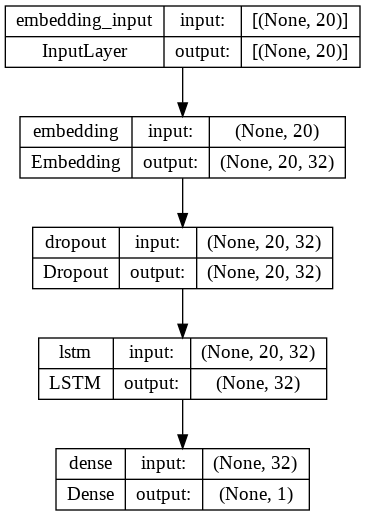

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

The first dimension is the number of samples (batch_size). Since it should be flexible and work with any number of samples or batch sizes, it is represented as None. So, don't worry about it. Your model does not care about the first dimension

### **Step - 3.4 :** Fitting Model

using 10 epochs with a batch size of 32

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
191/191 [==============================] - 22s 89ms/step - loss: 0.5407 - accuracy: 0.7271 - val_loss: 0.4326 - val_accuracy: 0.8116
Epoch 2/10
191/191 [==============================] - 17s 88ms/step - loss: 0.3750 - accuracy: 0.8417 - val_loss: 0.4528 - val_accuracy: 0.8030
Epoch 3/10
191/191 [==============================] - 17s 88ms/step - loss: 0.3264 - accuracy: 0.8608 - val_loss: 0.4864 - val_accuracy: 0.7938
Epoch 4/10
191/191 [==============================] - 17s 87ms/step - loss: 0.2910 - accuracy: 0.8833 - val_loss: 0.5467 - val_accuracy: 0.7807
Epoch 5/10
191/191 [==============================] - 17s 87ms/step - loss: 0.2662 - accuracy: 0.8924 - val_loss: 0.5996 - val_accuracy: 0.7866
Epoch 6/10
191/191 [==============================] - 17s 88ms/step - loss: 0.2421 - accuracy: 0.9031 - val_loss: 0.6217 - val_accuracy: 0.7774
Epoch 7/10
191/191 [==============================] - 17s 89ms/step - loss: 0.2176 - accuracy: 0.9118 - val_loss: 0.6950 - val_accuracy:

In [ ]:
#With callbacks
history1 = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test), callbacks= [callbacks])

Epoch 1/10
191/191 [==============================] - ETA: 0s - loss: 0.1496 - accuracy: 0.9363

191/191 [==============================] - 19s 101ms/step - loss: 0.1496 - accuracy: 0.9363 - val_loss: 0.9658 - val_accuracy: 0.7597 - lr: 0.0020
Epoch 2/10
191/191 [==============================] - ETA: 0s - loss: 0.1410 - accuracy: 0.9392

191/191 [==============================] - 20s 106ms/step - loss: 0.1410 - accuracy: 0.9392 - val_loss: 1.0430 - val_accuracy: 0.7689 - lr: 0.0020
Epoch 3/10
191/191 [==============================] - ETA: 0s - loss: 0.1379 - accuracy: 0.9404

191/191 [==============================] - 17s 87ms/step - loss: 0.1379 - accuracy: 0.9404 - val_loss: 1.0471 - val_accuracy: 0.7544 - lr: 0.0020
Epoch 4/10
191/191 [==============================] - ETA: 0s - loss: 0.1254 - accuracy: 0.9463

191/191 [==============================] - 16s 85ms/step - loss: 0.1254 - accuracy: 0.9463 - val_loss: 1.0710 - val_accuracy: 0.7663 - lr: 0.0020
Epoch 5/10
191/191 [==============================] - ETA: 0s - loss: 0.1199 - accuracy: 0.9466

191/191 [==============================] - 17s 87ms/step - loss: 0.1199 - accuracy: 0.9466 - val_loss: 1.1382 - val_accuracy: 0.7649 - lr: 0.0020
Epoch 6/10
191/191 [==============================] - ETA: 0s - loss: 0.1139 - accuracy: 0.9499

191/191 [==============================] - 16s 86ms/step - loss: 0.1139 - accuracy: 0.9499 - val_loss: 1.1522 - val_accuracy: 0.7571 - lr: 0.0020
Epoch 7/10
191/191 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9601

191/191 [==============================] - 16s 84ms/step - loss: 0.0944 - accuracy: 0.9601 - val_loss: 1.2424 - val_accuracy: 0.7590 - lr: 2.0000e-04
Epoch 8/10
191/191 [==============================] - ETA: 0s - loss: 0.0869 - accuracy: 0.9616

191/191 [==============================] - 16s 85ms/step - loss: 0.0869 - accuracy: 0.9616 - val_loss: 1.2726 - val_accuracy: 0.7597 - lr: 2.0000e-04
Epoch 9/10
191/191 [==============================] - ETA: 0s - loss: 0.0874 - accuracy: 0.9608

191/191 [==============================] - 16s 85ms/step - loss: 0.0874 - accuracy: 0.9608 - val_loss: 1.2931 - val_accuracy: 0.7597 - lr: 2.0000e-04
Epoch 10/10
191/191 [==============================] - ETA: 0s - loss: 0.0816 - accuracy: 0.9637

191/191 [==============================] - 16s 85ms/step - loss: 0.0816 - accuracy: 0.9637 - val_loss: 1.3092 - val_accuracy: 0.7577 - lr: 2.0000e-04


In [ ]:
#Changing the Learning rate
embed_dim = 32
lstm_out = 32
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy']) #Since we are doing binary classification 

In [ ]:
q AZembed_dim = 32
lstm_out = 32
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.01)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy']) #Since we are doing binary classification
history2 = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test), callbacks= [callbacks])

Epoch 1/10
191/191 [==============================] - ETA: 0s - loss: 0.5073 - accuracy: 0.7535

191/191 [==============================] - 19s 87ms/step - loss: 0.5073 - accuracy: 0.7535 - val_loss: 0.4681 - val_accuracy: 0.7787 - lr: 0.0100
Epoch 2/10
191/191 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.8458

191/191 [==============================] - 17s 87ms/step - loss: 0.3688 - accuracy: 0.8458 - val_loss: 0.4913 - val_accuracy: 0.7905 - lr: 0.0100
Epoch 3/10
191/191 [==============================] - ETA: 0s - loss: 0.3030 - accuracy: 0.8744

191/191 [==============================] - 17s 90ms/step - loss: 0.3030 - accuracy: 0.8744 - val_loss: 0.5215 - val_accuracy: 0.7846 - lr: 0.0100
Epoch 4/10
191/191 [==============================] - ETA: 0s - loss: 0.2501 - accuracy: 0.8926

191/191 [==============================] - 17s 87ms/step - loss: 0.2501 - accuracy: 0.8926 - val_loss: 0.6085 - val_accuracy: 0.7754 - lr: 0.0100
Epoch 5/10
191/191 [==============================] - ETA: 0s - loss: 0.2116 - accuracy: 0.9069

191/191 [==============================] - 16s 86ms/step - loss: 0.2116 - accuracy: 0.9069 - val_loss: 0.7033 - val_accuracy: 0.7728 - lr: 0.0100
Epoch 6/10
191/191 [==============================] - ETA: 0s - loss: 0.1843 - accuracy: 0.9200

191/191 [==============================] - 16s 86ms/step - loss: 0.1843 - accuracy: 0.9200 - val_loss: 0.7929 - val_accuracy: 0.7728 - lr: 0.0100
Epoch 7/10
191/191 [==============================] - ETA: 0s - loss: 0.1397 - accuracy: 0.9407

191/191 [==============================] - 17s 87ms/step - loss: 0.1397 - accuracy: 0.9407 - val_loss: 0.8145 - val_accuracy: 0.7833 - lr: 1.0000e-03
Epoch 8/10
191/191 [==============================] - ETA: 0s - loss: 0.1279 - accuracy: 0.9458

191/191 [==============================] - 17s 87ms/step - loss: 0.1279 - accuracy: 0.9458 - val_loss: 0.8824 - val_accuracy: 0.7820 - lr: 1.0000e-03
Epoch 9/10
191/191 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9473

191/191 [==============================] - 17s 87ms/step - loss: 0.1229 - accuracy: 0.9473 - val_loss: 0.9163 - val_accuracy: 0.7814 - lr: 1.0000e-03
Epoch 10/10
191/191 [==============================] - ETA: 0s - loss: 0.1176 - accuracy: 0.9519

191/191 [==============================] - 19s 101ms/step - loss: 0.1176 - accuracy: 0.9519 - val_loss: 0.9579 - val_accuracy: 0.7774 - lr: 1.0000e-03


In [ ]:
embed_dim = 32
lstm_out = 32
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002, amsgrad=True)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy']) #Since we are doing binary classification
history = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test), callbacks= [callbacks])

# What is AMSGrad in Adam Optimizer?
# AMSGrad is an extension to the Adam version of gradient descent that attempts to improve the convergence properties of the algorithm,
# avoiding large abrupt changes in the learning rate for each input variable.

Epoch 1/10
191/191 [==============================] - ETA: 0s - loss: 0.5485 - accuracy: 0.7154

191/191 [==============================] - 19s 88ms/step - loss: 0.5485 - accuracy: 0.7154 - val_loss: 0.4405 - val_accuracy: 0.7991 - lr: 0.0020
Epoch 2/10
191/191 [==============================] - ETA: 0s - loss: 0.3746 - accuracy: 0.8404

191/191 [==============================] - 19s 102ms/step - loss: 0.3746 - accuracy: 0.8404 - val_loss: 0.4515 - val_accuracy: 0.7971 - lr: 0.0020
Epoch 3/10
191/191 [==============================] - ETA: 0s - loss: 0.3238 - accuracy: 0.8658

191/191 [==============================] - 16s 86ms/step - loss: 0.3238 - accuracy: 0.8658 - val_loss: 0.4795 - val_accuracy: 0.7912 - lr: 0.0020
Epoch 4/10
191/191 [==============================] - ETA: 0s - loss: 0.2843 - accuracy: 0.8859

191/191 [==============================] - 17s 87ms/step - loss: 0.2843 - accuracy: 0.8859 - val_loss: 0.5315 - val_accuracy: 0.7873 - lr: 0.0020
Epoch 5/10
191/191 [==============================] - ETA: 0s - loss: 0.2551 - accuracy: 0.8943

191/191 [==============================] - 17s 87ms/step - loss: 0.2551 - accuracy: 0.8943 - val_loss: 0.5863 - val_accuracy: 0.7840 - lr: 0.0020
Epoch 6/10
191/191 [==============================] - ETA: 0s - loss: 0.2232 - accuracy: 0.9099

191/191 [==============================] - 17s 88ms/step - loss: 0.2232 - accuracy: 0.9099 - val_loss: 0.6754 - val_accuracy: 0.7682 - lr: 0.0020
Epoch 7/10
191/191 [==============================] - ETA: 0s - loss: 0.1661 - accuracy: 0.9389

191/191 [==============================] - 17s 87ms/step - loss: 0.1661 - accuracy: 0.9389 - val_loss: 0.7321 - val_accuracy: 0.7741 - lr: 2.0000e-04
Epoch 8/10
191/191 [==============================] - ETA: 0s - loss: 0.1600 - accuracy: 0.9358

191/191 [==============================] - 16s 86ms/step - loss: 0.1600 - accuracy: 0.9358 - val_loss: 0.7564 - val_accuracy: 0.7748 - lr: 2.0000e-04
Epoch 9/10
191/191 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9392

191/191 [==============================] - 16s 86ms/step - loss: 0.1558 - accuracy: 0.9392 - val_loss: 0.7815 - val_accuracy: 0.7794 - lr: 2.0000e-04
Epoch 10/10
191/191 [==============================] - ETA: 0s - loss: 0.1506 - accuracy: 0.9374

191/191 [==============================] - 16s 85ms/step - loss: 0.1506 - accuracy: 0.9374 - val_loss: 0.8012 - val_accuracy: 0.7735 - lr: 2.0000e-04


In [ ]:
plot_dict = history.history
plot_dict

{'loss': [0.5485154390335083,
  0.3745814263820648,
  0.32383978366851807,
  0.2842651307582855,
  0.25511497259140015,
  0.2232421636581421,
  0.16605941951274872,
  0.15996041893959045,
  0.15575502812862396,
  0.1505674421787262],
 'accuracy': [0.7154351472854614,
  0.8403940796852112,
  0.8658456206321716,
  0.8858785033226013,
  0.8942528963088989,
  0.9098522067070007,
  0.9389162659645081,
  0.9357963800430298,
  0.9392446875572205,
  0.937438428401947],
 'val_loss': [0.4404684901237488,
  0.451456218957901,
  0.4794955253601074,
  0.5315280556678772,
  0.5862701535224915,
  0.6753926873207092,
  0.7320510745048523,
  0.7563747763633728,
  0.7814869284629822,
  0.8012023568153381],
 'val_accuracy': [0.7990807890892029,
  0.7971109747886658,
  0.7912015914916992,
  0.787261962890625,
  0.7839789986610413,
  0.7682206034660339,
  0.7741299867630005,
  0.7747865915298462,
  0.7793828248977661,
  0.7734733819961548],
 'lr': [0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.00

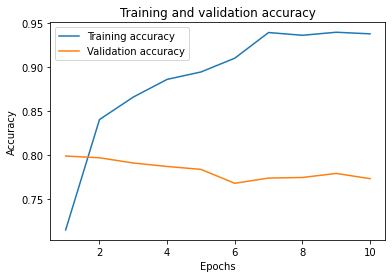

In [ ]:
plot_dict = history.history
accuracy = plot_dict['accuracy']
epochs = range(1,len(accuracy) + 1)
val_acc = plot_dict['val_accuracy']
plt.title("Training and validation accuracy")
plt.plot(epochs, accuracy, label = "Training accuracy")
plt.plot(epochs, val_acc, label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### **Step - 3.5 :** Predicting using Model

In [ ]:
y_pred = model.predict(X_test).round()

48/48 [==============================] - 1s 7ms/step


### **Step - 3.6 :** Model Evaluation 

In [ ]:
train_accuracy = round(metrics.accuracy_score(y_train,model.predict(X_train).round())*100)
print("Accuracy Obtained =", train_accuracy, '%')


191/191 [==============================] - 1s 7ms/step
Accuracy Obtained = 95 %


In [ ]:
print('Accuracy  is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall  is    : ', (metrics.recall_score(y_test, y_pred))) # Recall = True Positive/ (True Positive + False Negative)  
print('Precision  is : ', (metrics.precision_score(y_test, y_pred))) #Precision = True Positive/ (True Positive + False Positive)

Accuracy  is  :  0.7734734077478661
Recall  is    :  0.7408536585365854
Precision  is :  0.735249621785174


### **Step - 3.7 :** Creating Confusion Matrix 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

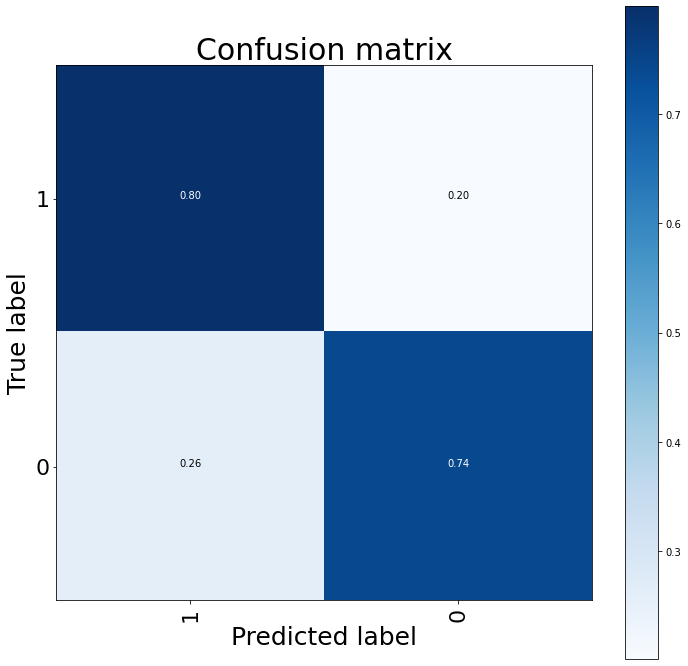

'\nTP  FN\n\nFP  TN\n\n'

In [ ]:


cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=y_train.unique(), title="Confusion matrix")
plt.show()


'''
TP  FN

FP  TN

'''


In [ ]:
print(classification_report(y_test, y_pred))

#F1 score =  the harmonic mean of precision and recall

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       867
           1       0.74      0.74      0.74       656

    accuracy                           0.77      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.77      0.77      0.77      1523



### **Step - 3.8 :** Predicting Actual Test Tweets 

In [ ]:
# Tokenisation on full train dataset

l =50
max_features=5000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(treated_train['lemma_str'].values)
X = tokenizer.texts_to_sequences(treated_train['lemma_str'].values)
X = pad_sequences(X, maxlen =l)

In [ ]:
# Tokenisation on full test dataset

tokenizer.fit_on_texts(treated_train['lemma_str'].values)
test_token = tokenizer.texts_to_sequences(treated_test['lemma_str'].values)
test_token = pad_sequences(test_token, maxlen =l) #Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence.

In [ ]:
# Model call with little bit of optimisation based on previous results

embed_dim = 100
lstm_out = 100
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.4))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=2e-3)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           500000    
                                                                 
 dropout_4 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 50, 100)           80400     
                                                                 
 dropout_5 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

Added another LSTM layer and 2 more dropout layers

return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False



When the return_sequences argument is set to False (default), the network will only output hn, i.e. the hidden state at the final time step, we want all time steps


Why is return sequences true https://www.kaggle.com/code/kmkarakaya/lstm-output-types-return-sequences-state/notebook

In [ ]:
model.fit(X,y, epochs = 10,validation_split = 0.2 ,callbacks=[callbacks], batch_size=32)

Epoch 1/10
191/191 [==============================] - ETA: 0s - loss: 0.5258 - accuracy: 0.7348

191/191 [==============================] - 83s 412ms/step - loss: 0.5258 - accuracy: 0.7348 - val_loss: 0.4749 - val_accuracy: 0.7807 - lr: 0.0020
Epoch 2/10
191/191 [==============================] - ETA: 0s - loss: 0.3622 - accuracy: 0.8475

191/191 [==============================] - 78s 408ms/step - loss: 0.3622 - accuracy: 0.8475 - val_loss: 0.5062 - val_accuracy: 0.7617 - lr: 0.0020
Epoch 3/10
191/191 [==============================] - ETA: 0s - loss: 0.2866 - accuracy: 0.8882

191/191 [==============================] - 75s 393ms/step - loss: 0.2866 - accuracy: 0.8882 - val_loss: 0.5309 - val_accuracy: 0.7603 - lr: 0.0020
Epoch 4/10
191/191 [==============================] - ETA: 0s - loss: 0.2321 - accuracy: 0.9094

191/191 [==============================] - 75s 394ms/step - loss: 0.2321 - accuracy: 0.9094 - val_loss: 0.6790 - val_accuracy: 0.7420 - lr: 0.0020
Epoch 5/10
191/191 [==============================] - ETA: 0s - loss: 0.1758 - accuracy: 0.9317

191/191 [==============================] - 81s 424ms/step - loss: 0.1758 - accuracy: 0.9317 - val_loss: 0.8220 - val_accuracy: 0.7315 - lr: 0.0020
Epoch 6/10
191/191 [==============================] - ETA: 0s - loss: 0.1342 - accuracy: 0.9429

191/191 [==============================] - 75s 391ms/step - loss: 0.1342 - accuracy: 0.9429 - val_loss: 1.0845 - val_accuracy: 0.7216 - lr: 0.0020
Epoch 7/10
191/191 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9617

191/191 [==============================] - 76s 397ms/step - loss: 0.0878 - accuracy: 0.9617 - val_loss: 1.2557 - val_accuracy: 0.7269 - lr: 2.0000e-04
Epoch 8/10
191/191 [==============================] - ETA: 0s - loss: 0.0817 - accuracy: 0.9645

191/191 [==============================] - 74s 389ms/step - loss: 0.0817 - accuracy: 0.9645 - val_loss: 1.3298 - val_accuracy: 0.7275 - lr: 2.0000e-04
Epoch 9/10
191/191 [==============================] - ETA: 0s - loss: 0.0772 - accuracy: 0.9645

191/191 [==============================] - 81s 422ms/step - loss: 0.0772 - accuracy: 0.9645 - val_loss: 1.3878 - val_accuracy: 0.7282 - lr: 2.0000e-04
Epoch 10/10
191/191 [==============================] - ETA: 0s - loss: 0.0724 - accuracy: 0.9681

191/191 [==============================] - 74s 387ms/step - loss: 0.0724 - accuracy: 0.9681 - val_loss: 1.4559 - val_accuracy: 0.7288 - lr: 2.0000e-04


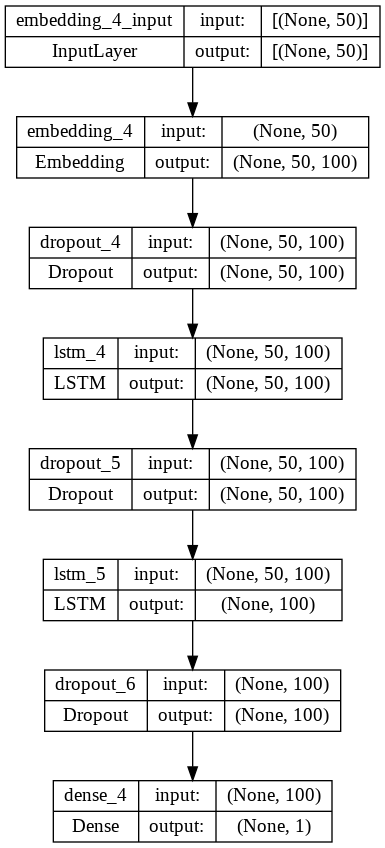

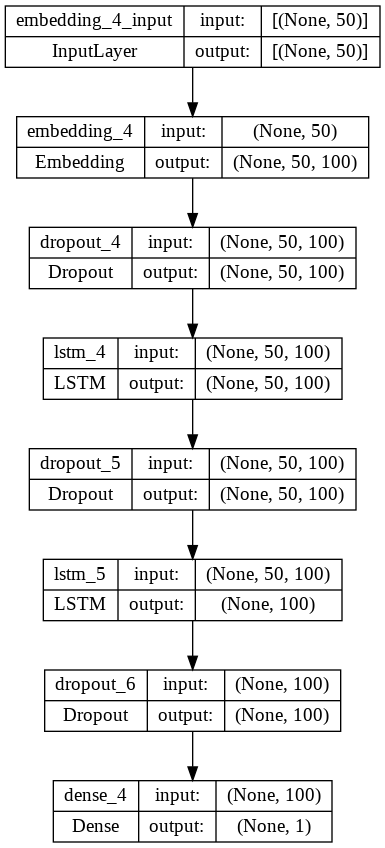

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

#Conclusion

Therefore we have done Disaster Classification on Twitter Data using an LSTM

Problems faced

* Combining both test and train datasets for merged dataset creation
* Removing not stop words
* Removing emojis
* WordnetTagger
* Slow GPU
* Deciding the maximum features

Other Resources


https://www.kaggle.com/competitions/nlp-getting-started

https://www.tensorflow.org/api_docs/python/tf/keras

https://www.javatpoint.com/precision-and-recall-in-machine-learning

 https://stackoverflow.com/questions/61760508/how-to-choose-num-words-parameter-for-keras-tokenizer

 https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do


 https://stackoverflow.com/questions/71787993/keras-pad-sequence-and-tokenizer


